In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn
import scipy.stats as st
import math
import statsmodels.api as stap
import sklearn.linear_model as lm
import sklearn.model_selection as ms
import sklearn.metrics as metrics
import statsmodels.stats.outliers_influence as outliers_influence

In [2]:
df = pd.read_csv(r"D:\abalone.csv")

In [3]:
df.dtypes

Sex                       object
Length                   float64
Diameter                 float64
Height                   float64
Whole_weight             float64
Shucked_weight           float64
Viscera_weight           float64
Shell_weight             float64
Class_number_of_rings      int64
dtype: object

In [4]:
trueOrFalse = df.isnull().sum()
print(trueOrFalse)
if(trueOrFalse.sum() == False): 
    print('No missing values are present.')
df

Sex                      0
Length                   0
Diameter                 0
Height                   0
Whole_weight             0
Shucked_weight           0
Viscera_weight           0
Shell_weight             0
Class_number_of_rings    0
dtype: int64
No missing values are present.


,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Class_number_of_rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [5]:
newDf = pd.get_dummies(df)
newDf

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Class_number_of_rings,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,1,0,0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,0,0,1
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,0,0,1
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,1,0,0


In [6]:
rho, pval = st.spearmanr(newDf)
pd.DataFrame(rho)


,0,1,2,3,4,5,6,7,8,9,10
0,1.000000,0.983319,0.888206,0.972633,0.956830,0.952658,0.947926,0.604385,0.308737,-0.553044,0.238968
1,0.983319,1.000000,0.895705,0.971324,0.950472,0.948391,0.954149,0.622895,0.316493,-0.565927,0.243992
2,0.888206,0.895705,1.000000,0.915985,0.874196,0.900587,0.921224,0.657716,0.320853,-0.563194,0.237145
3,0.972633,0.971324,0.915985,1.000000,0.977060,0.975252,0.969426,0.630832,0.321128,-0.590804,0.263649
4,0.956830,0.950472,0.874196,0.977060,1.000000,0.947635,0.917730,0.539420,0.292583,-0.558628,0.259933
5,0.952658,0.948391,0.900587,0.975252,0.947635,1.000000,0.938143,0.614344,0.330057,-0.593521,0.257687
6,0.947926,0.954149,0.921224,0.969426,0.917730,0.938143,1.000000,0.692475,0.323888,-0.582995,0.253421
7,0.604385,0.622895,0.657716,0.630832,0.539420,0.614344,0.692475,1.000000,0.283812,-0.507429,0.218739
8,0.308737,0.316493,0.320853,0.321128,0.292583,0.330057,0.323888,0.283812,1.000000,-0.464298,-0.512528
9,-0.553044,-0.565927,-0.563194,-0.590804,-0.558628,-0.593521,-0.582995,-0.507429,-0.464298,1.000000,-0.522541


My target variable, "Class_number_of_rings," is most strongly correlated with "Shell_Weight."

In [7]:
selected = newDf[['Shell_weight', 'Class_number_of_rings']]
selected

,Shell_weight,Class_number_of_rings
0,0.1500,15
1,0.0700,7
2,0.2100,9
3,0.1550,10
4,0.0550,7
...,...,...
4172,0.2490,11
4173,0.2605,10
4174,0.3080,9
4175,0.2960,10


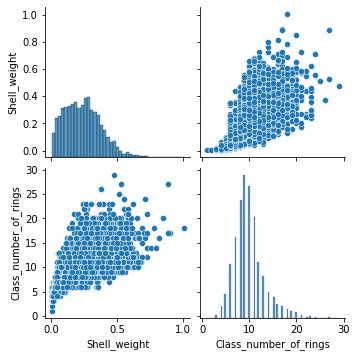

In [8]:
seaborn.pairplot(selected)

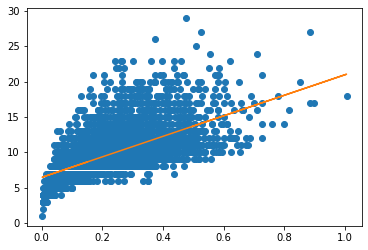

In [9]:
y = selected['Class_number_of_rings'].values
x = stap.add_constant(selected['Shell_weight'].values)
model = stap.OLS(y, x)
result = model.fit()
plt.plot(selected['Shell_weight'], selected['Class_number_of_rings'], 'o')
plt.plot(selected['Shell_weight'], result.predict(x))
plt.show()

In [10]:
print("Residual variance of regression ", result.mse_resid)

Residual variance of regression  6.302608209402122


In [11]:
parametrs = result.params
covMatrix = result.cov_params()

N = len(y)
alpha = 0.05
n = N
m = len(x[0])

for i, p in enumerate(parametrs):
    t = p / math.sqrt(covMatrix[i, i])  
    p_val = 2 * (1 - st.t.cdf(abs(t), n - m - 1))
 
    if p_val >= alpha:
        print("t = ", t, " p = ", p_val, "Insignificant")
    else:
        print("t = ", t, " p = ", p_val,  "Significant")



t =  83.76431447423504  p =  0.0 Significant
t =  52.08382432934553  p =  0.0 Significant


In [12]:
rs = result.rsquared
print("Value of the coefficient of determination ", round(rs, 3), round(rs * 100, 3), "%")
f = (rs / (1 - rs)) * ((n - m - 1) /m)
p = 1 - st.f.cdf(f, m, n - m-1)

if p >= alpha:
    print("f = ", f, " p = ", round(p, 4), "Insignificant")
else:
    print("f = ", f, " p = ", round(p, 4), "Significant")

Value of the coefficient of determination  0.394 39.385 %
f =  1356.0375011686833  p =  0.0 Significant


In [13]:
newDf

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Class_number_of_rings,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,1,0,0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,0,0,1
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,0,0,1
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,1,0,0


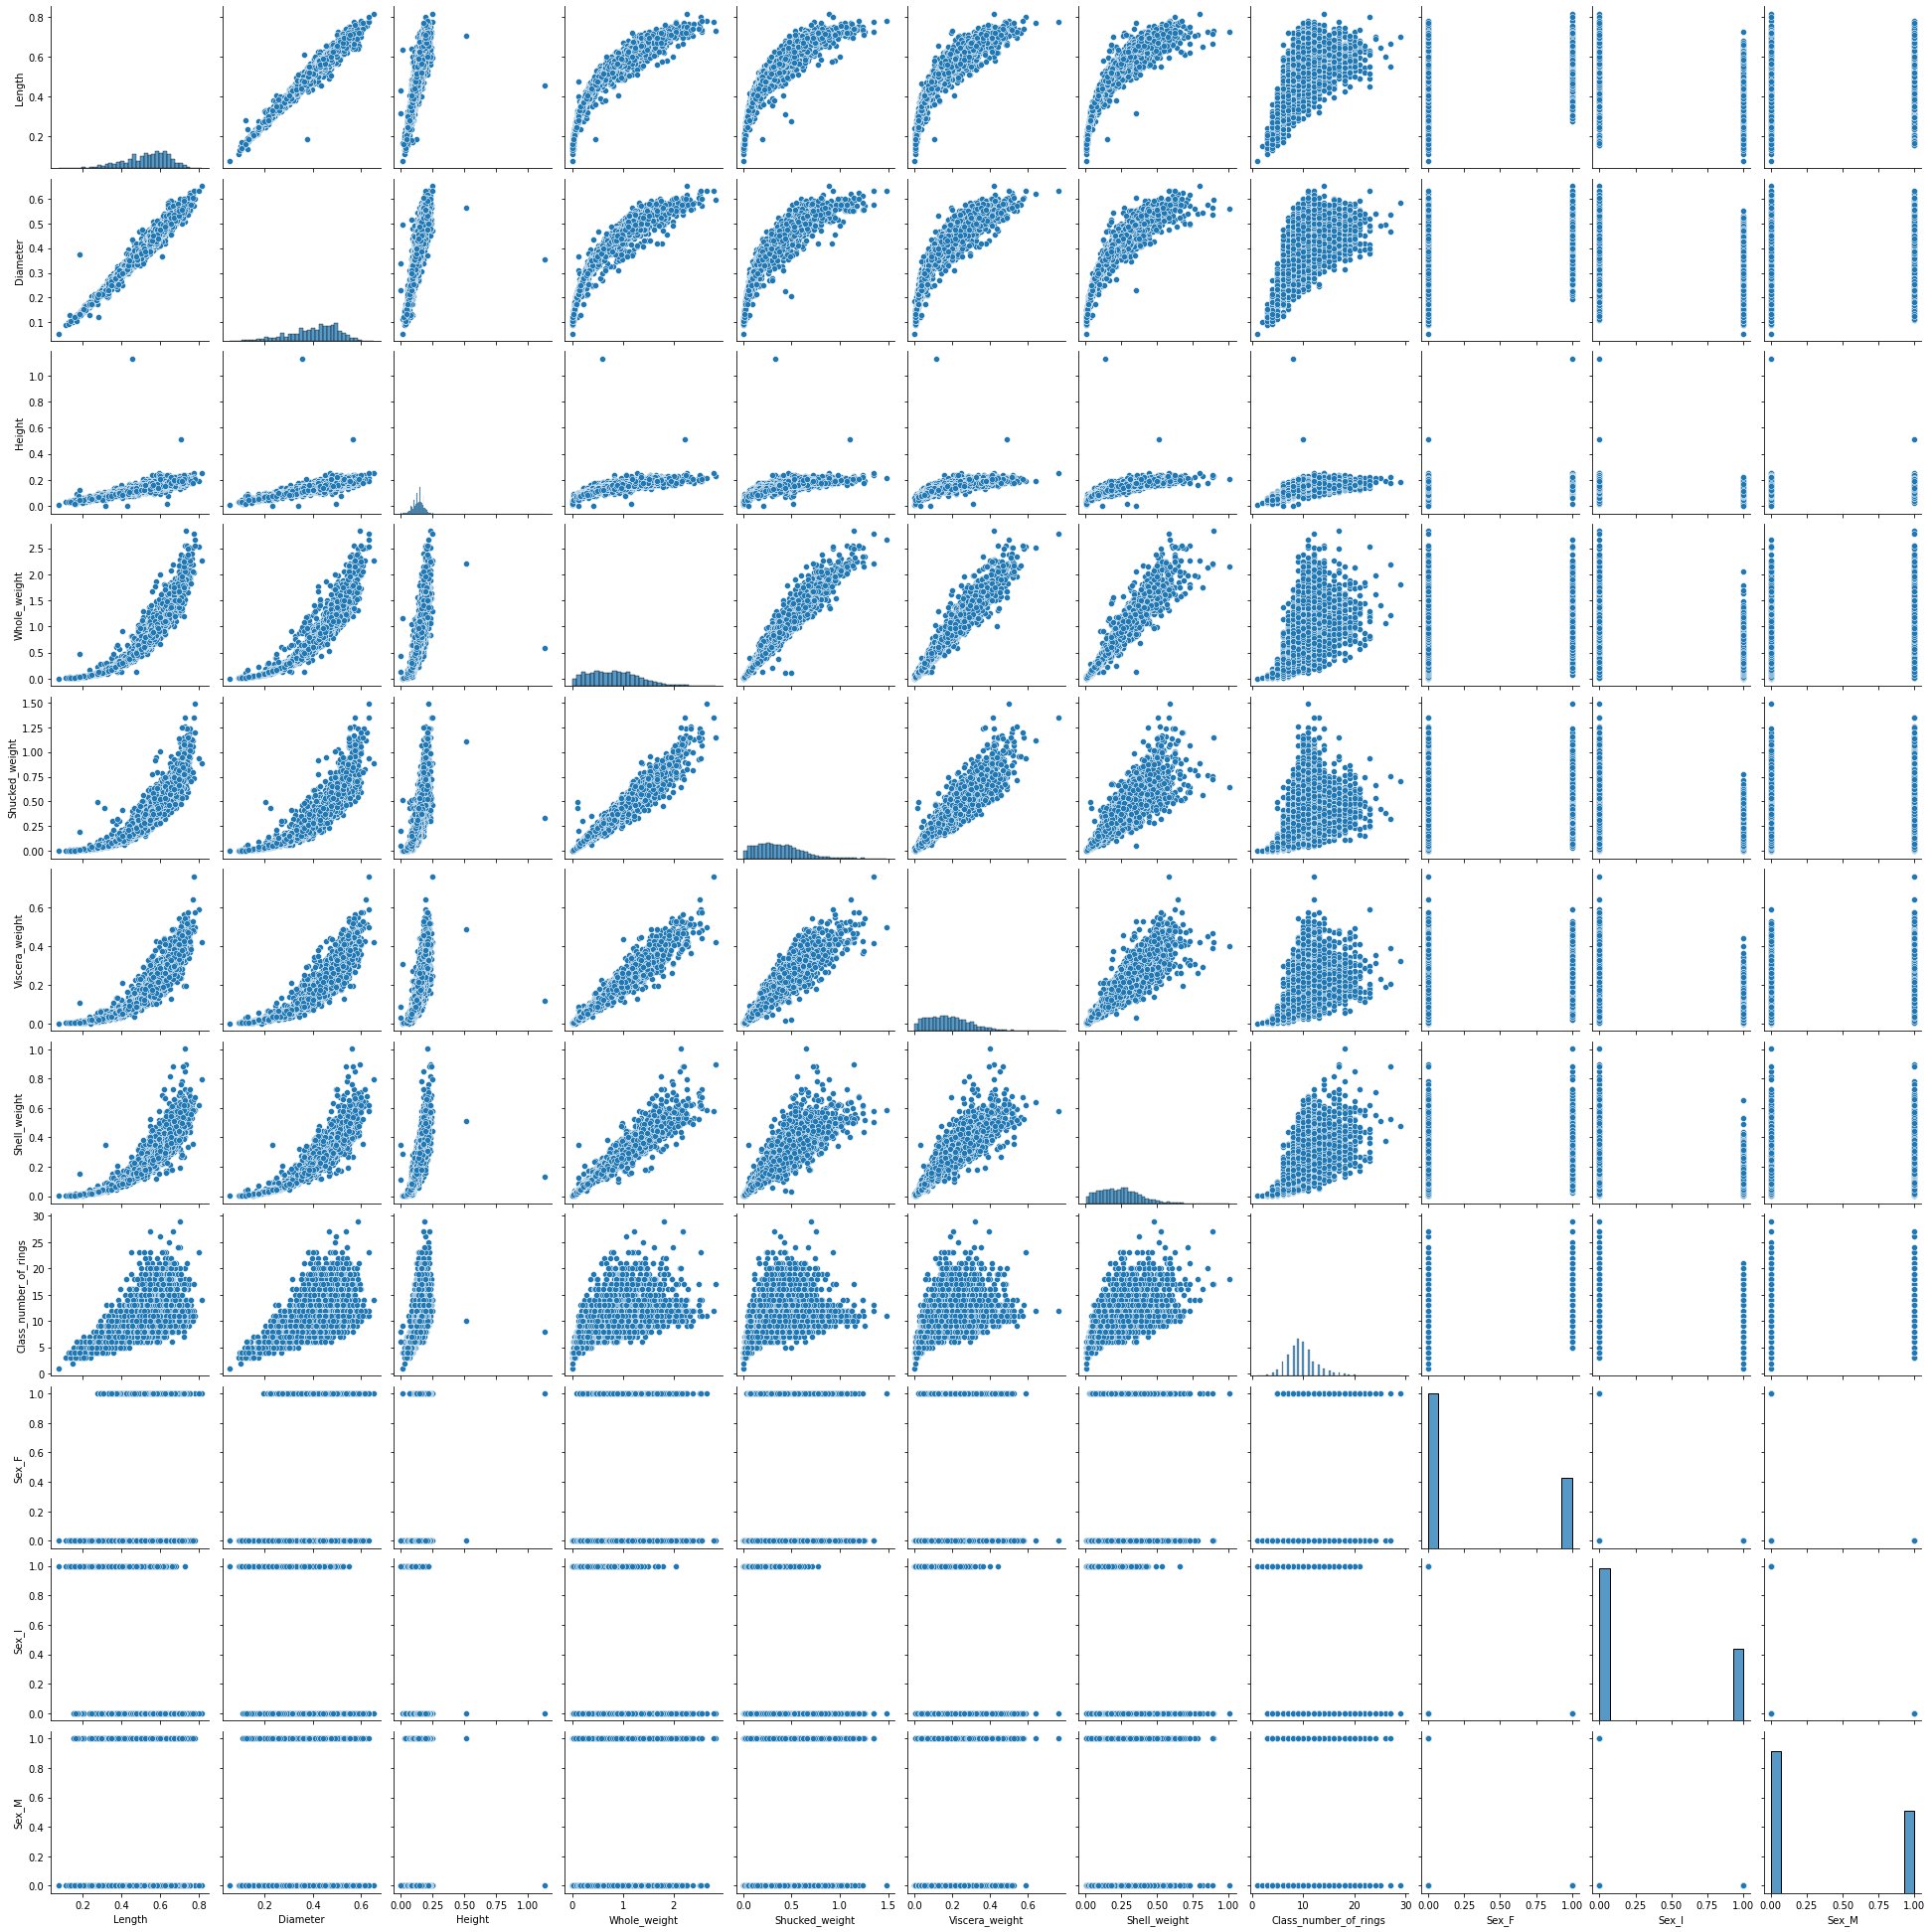

In [14]:
seaborn.pairplot(newDf)

In [15]:
y = newDf['Class_number_of_rings'].values
x = stap.add_constant(newDf.loc[:,(newDf.columns != 'Class_number_of_rings')].values)
model = stap.OLS(y, x)
result = model.fit()
rs = result.rsquared

In [16]:
print("Residual variance of the regression ", result.mse_resid)

Residual variance of the regression  4.814189938361682


In [17]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.538
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     538.9
Date:                Tue, 08 Aug 2023   Prob (F-statistic):               0.00
Time:                        23:33:45   Log-Likelihood:                -9204.1
No. Observations:                4177   AIC:                         1.843e+04
Df Residuals:                    4167   BIC:                         1.849e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7292      0.207     13.185      0.000       2.323       3.135
x1            -0.4583      1.809     -0.253      0.800      -4.005       3.089
x2            11.0751      2.227      4.972      0.000       6.708      15.442
x3            10.7615      1.536      7.005      0.000       7.750      13.773
x4             8.9754      0.725     12.373      0.000       7.553      10.398
x5           -19.7869      0.817    -24.209      0.000     -21.389     -18.184
x6           -10.5818      1.294     -8.179      0.000     -13.118      -8.045
x7             8.7418      1.125      7.772      0.000       6.537      10.947
x8             1.1655      0.095     12.209      0.000       0.978       1.353
x9             0.3406      0.079      4.318      0.000       0.186       0.495
x10            1.2232      0.088     13.838      0.000       1.050       1.396
==============================================================================
Omnibus:                      947.032   Durbin-Watson:                   1.436
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2710.271
Skew:                           1.181   Prob(JB):                         0.00
Kurtosis:                       6.162   Cond. No.                     6.38e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.94e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [18]:
print("Value of the coefficient of determination ", round(rs, 3), round(rs * 100, 3), "%")

Value of the coefficient of determination  0.538 53.788 %


The coefficient of determination increased from 40 percent to 54 percent.

In [19]:
parametrs = result.params
covMatrix = result.cov_params()

N = len(y)
n = N
m = len(x[0])
alpha = 0.05

for i, p in enumerate(parametrs):
    t = p / math.sqrt(covMatrix[i, i])  
    p_val = 2 * (1 - st.t.cdf(abs(t), n - m - 1))
 
    if p_val >= alpha:
        print("t = ", t, " p = ", round(p_val, 3), "Insignificant")
    else:
        print("t = ", t, "  p = ", round(p_val, 3),  "Significant")


t =  13.185213150074992   p =  0.0 Significant
t =  -0.253346521975853  p =  0.8 Insignificant
t =  4.97247830079155   p =  0.0 Significant
t =  7.005283295149198   p =  0.0 Significant
t =  12.373029888323208   p =  0.0 Significant
t =  -24.208559169913222   p =  0.0 Significant
t =  -8.17919722107066   p =  0.0 Significant
t =  7.772349226360405   p =  0.0 Significant
t =  12.20866752958827   p =  0.0 Significant
t =  4.318044673577893   p =  0.0 Significant
t =  13.837817579152594   p =  0.0 Significant


In [20]:
rs = result.rsquared
print("Value of the coefficient of determination ", round(rs, 3), round(rs * 100, 3), "%")
f = (rs / (1 - rs)) * ((n - m - 1) /m)
p = 1 - st.f.cdf(f, m, n - m-1)

if p >= alpha:
    print("f = ", f, " p = ", round(p, 4), "Insignificant")
else:
    print("f = ", f, " p = ", round(p, 4), "Significant")

Value of the coefficient of determination  0.538 53.788 %
f =  440.7178544679211  p =  0.0 Significant


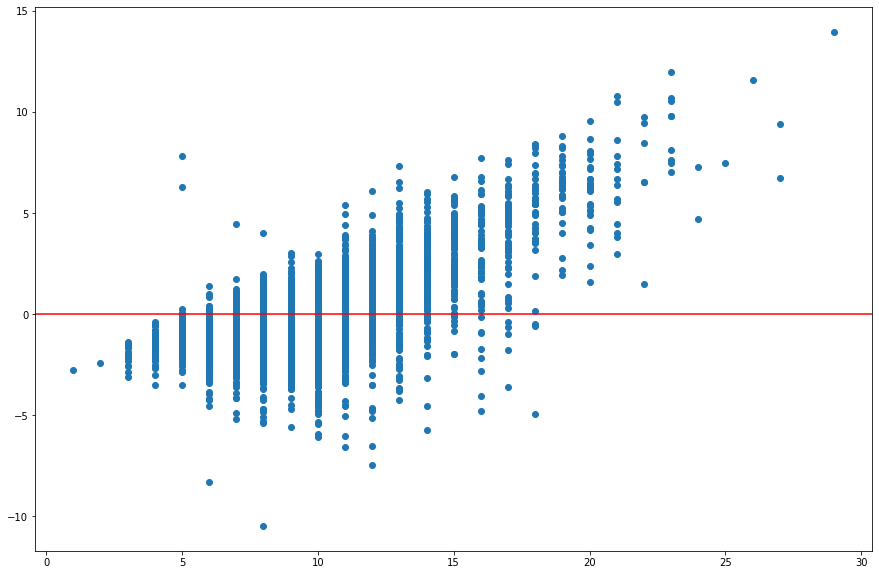

ShapiroResult(statistic=0.9256653189659119, pvalue=2.2318480641301361e-41)
Non-normal distribution


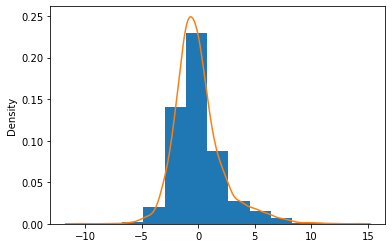

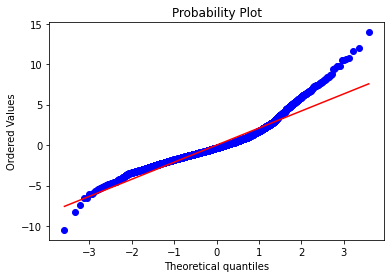

In [21]:
resid = result.resid

plt.subplots(1, 1, figsize=(15,10))
plt.plot(y,resid, 'o')
plt.axhline(0, color = 'r')
plt.show()
res = st.shapiro(resid)
print(res)
if res[1] > alpha:
    print("Normal distribution")
else:
    print("Non-normal distribution")    


plt.hist(resid, bins=int(1 + 3.32 * math.log10(len(resid))), density=True)
seaborn.kdeplot(resid) ;
plt.show()

st.probplot(resid, plot=plt) ;

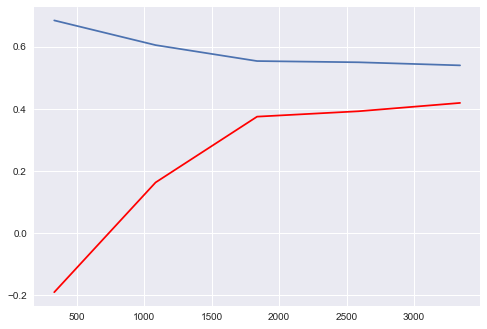

In [22]:
x = stap.add_constant(newDf.loc[:,(newDf.columns != 'Class_number_of_rings')].values)
model = lm.LinearRegression()
model.fit(x, y)
trainSizes, trainScores, testScores = ms.learning_curve(model, x, y)
train_scores_mean = trainScores.mean(axis = 1)
validation_scores_mean = testScores.mean(axis = 1)
plt.style.use('seaborn')
plt.plot(trainSizes, train_scores_mean, label = 'Training error')
plt.plot(trainSizes, validation_scores_mean, color = 'red', label = 'Validation error')
plt.show()

In [23]:
x.shape

(4177, 11)

In [24]:
len(y)

4177

Since the sample size is quite large, over 4000, I believe overfitting has occurred.

In [25]:
r2_score = metrics.r2_score(y, model.predict(x))
print("Coefficient of determination ",  round(r2_score, 3))

Coefficient of determination  0.537


Excluding insignificant indicators.

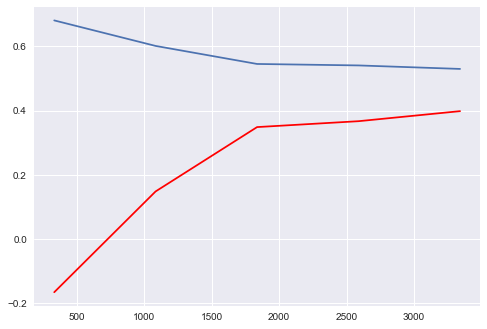

Coefficient of determination  0.528


In [26]:
selectedNew = newDf.loc[:,(newDf.columns != 'Sex_I')&
                           (newDf.columns != 'Sex_M')&
                           (newDf.columns != 'Sex_F')&
                           (newDf.columns != 'Length')&
                           (newDf.columns != 'Class_number_of_rings')]

x = stap.add_constant(selectedNew.values)
model = lm.LinearRegression()
model.fit(x, y)
trainSizes, trainScores, testScores = ms.learning_curve(model, x, y)

train_scores_mean = trainScores.mean(axis = 1)
validation_scores_mean = testScores.mean(axis = 1)
plt.style.use('seaborn')
plt.plot(trainSizes, train_scores_mean, label = 'Training error')
plt.plot(trainSizes, validation_scores_mean, color = 'red', label = 'Validation error')
plt.show()

r2_score = metrics.r2_score(y, model.predict(x))
print("Coefficient of determination ",  round(r2_score, 3))

The coefficient of determination decreased, and from the graph, it can be inferred that overfitting still remains. In other words, the coefficient of determination decreased slightly, and there was no improvement.

In [27]:
x = stap.add_constant(newDf.loc[:, newDf.columns != 'Class_number_of_rings'].values)

model = stap.OLS(y, x)
result = model.fit()

vif = pd.DataFrame()
vif["features"] = newDf.columns
vif['VIF'] = [outliers_influence.variance_inflation_factor(x, i) for i in range(len(result.params))]
vif

C:\Users\alyti\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\alyti\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,features,VIF
0,Length,0.000000
1,Diameter,40.945763
2,Height,42.379841
3,Whole_weight,3.581369
4,Shucked_weight,109.768710
5,Viscera_weight,28.550546
6,Shell_weight,17.445012
7,Class_number_of_rings,21.263272
8,Sex_F,inf
9,Sex_I,inf


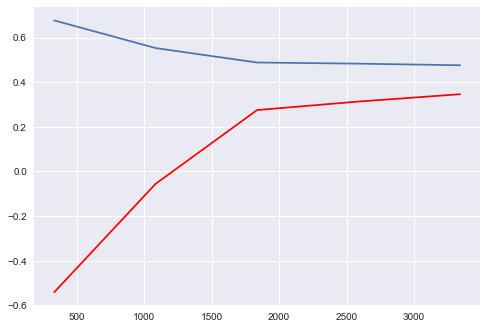

Coefficient of determination  0.473


In [28]:
selectedNew = newDf.loc[:,(newDf.columns != 'Shucked_weight')&
                           (newDf.columns != 'Class_number_of_rings')]

x = stap.add_constant(selectedNew.values)
model = lm.LinearRegression()

model.fit(x, y)
trainSizes, trainScores, testScores = ms.learning_curve(model, x, y)

train_scores_mean = trainScores.mean(axis = 1)
validation_scores_mean = testScores.mean(axis = 1)
plt.style.use('seaborn')
plt.plot(trainSizes, train_scores_mean, label = 'Training error')
plt.plot(trainSizes, validation_scores_mean, color = 'red', label = 'Validation error')
plt.show()

r2_score = metrics.r2_score(y, model.predict(x))
print("Coefficient of determination ",  round(r2_score, 3))

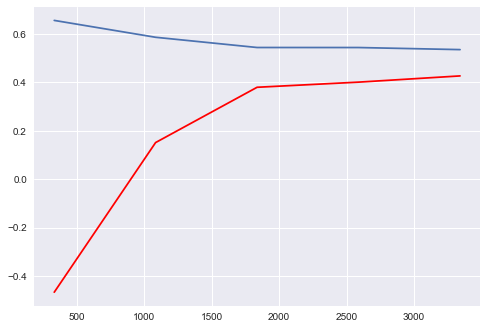

Coefficient of determination  0.535


In [29]:
selectedNew = newDf.loc[:, (newDf.columns != 'Class_number_of_rings')]

# selectedNew = newDf.loc[:,(newDf.columns != 'Sex_I')&
#                            (newDf.columns != 'Sex_M')&
#                            (newDf.columns != 'Sex_F')&
#                            (newDf.columns != 'Length')&
#                            (newDf.columns != 'Diameter')&
#                            (newDf.columns != 'Class_number_of_rings')]
x = stap.add_constant(selectedNew.values)
model = lm.Ridge()
model.fit(x, y)
trainSizes, trainScores, testScores = ms.learning_curve(model, x, y)

train_scores_mean = trainScores.mean(axis = 1)
validation_scores_mean = testScores.mean(axis = 1)
plt.style.use('seaborn')
plt.plot(trainSizes, train_scores_mean, label = 'Training error')
plt.plot(trainSizes, validation_scores_mean, color = 'red', label = 'Validation error')
plt.show()

r2_score = metrics.r2_score(y, model.predict(x))
print("Coefficient of determination ",  round(r2_score, 3))

In [30]:
data = df
del data['Sex']
data = data.loc[df['Height'] != 0]
data

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Class_number_of_rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [31]:
y = data['Class_number_of_rings'].values

In [32]:
data_h = data.loc[:,(data.columns != 'Class_number_of_rings')].apply(np.log)

In [33]:
data.loc[:,(data.columns != 'Class_number_of_rings')] = data_h

C:\Users\alyti\AppData\Local\Temp\ipykernel_1036\3267445764.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:,(data.columns != 'Class_number_of_rings')] = data_h


In [34]:
data

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Class_number_of_rings
0,-0.787458,-1.007858,-2.353878,-0.665532,-1.493880,-2.292635,-1.897120,15
1,-1.049822,-1.328025,-2.407946,-1.489435,-2.307598,-3.026191,-2.659260,7
2,-0.634878,-0.867501,-2.002481,-0.390084,-1.360627,-1.955456,-1.560648,9
3,-0.820981,-1.007858,-2.079442,-0.661649,-1.534794,-2.171557,-1.864330,10
4,-1.108663,-1.366492,-2.525729,-1.584745,-2.413517,-3.231455,-2.900422,7
...,...,...,...,...,...,...,...,...
4172,-0.570930,-0.798508,-1.801810,-0.119910,-0.994252,-1.431292,-1.390302,11
4173,-0.527633,-0.820981,-2.002481,-0.034591,-0.823256,-1.539446,-1.345152,10
4174,-0.510826,-0.744440,-1.584745,0.162119,-0.643405,-1.246532,-1.177655,9
4175,-0.470004,-0.723606,-1.897120,0.090298,-0.632993,-1.343235,-1.217396,10


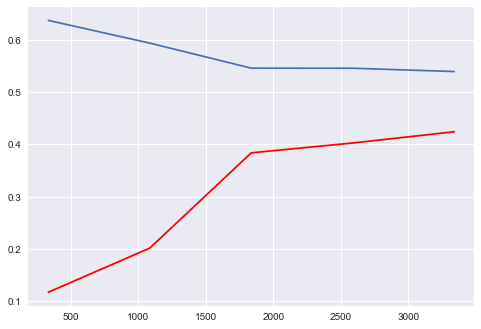

Coefficient of determination  0.538


In [35]:
x = stap.add_constant(data.loc[:,(data.columns != 'Class_number_of_rings')].values)
y = data['Class_number_of_rings'].values
model = lm.LinearRegression()
model.fit(x, y)
trainSizes, trainScores, testScores = ms.learning_curve(model, x, y)
train_scores_mean = trainScores.mean(axis = 1)
validation_scores_mean = testScores.mean(axis = 1)
plt.style.use('seaborn')
plt.plot(trainSizes, train_scores_mean, label = 'Training error')
plt.plot(trainSizes, validation_scores_mean, color = 'red', label = 'Validation error')
plt.show()
r2_score = metrics.r2_score(y, model.predict(x))
print("Coefficient of determination ",  round(r2_score, 3))

# Second part of the work(writing my functions)

In [36]:
def StandardDeviation(x, average, bias = False):
    if(bias):
        return math.sqrt(sum((s-average)**2 for s in x)/(len(x)-1))
    else:
        return math.sqrt(sum((s-average)**2 for s in x)/(len(x)))    
def histogram(x, bins = None, normed = 'frequency'):
    dat = pd.DataFrame(x) 
    x = dat[0]
    if bins==None:
        bins = int(round(1 + 1.44 * np.log(x.count())))
    if normed!='frequency' and normed!='probability' and normed!='density':
        print('Недопустиме значення аргументу normed')
        return None
    data = x.value_counts().sort_index()
    bin_array = np.linspace(x.min(), x.max(), bins + 1)
    myHist=[]
    hist = []
    paras = []

    for i in range(len(bin_array)-1):
        mask = (data.index>=bin_array[i])&(data.index<bin_array[i+1])
        hist.append((bin_array[i]+bin_array[i+1])/2.)
        myHist.append(data[mask].values.sum())  
    width = (x.max() - x.min()) / bins
 
    if normed=='frequency':
        plt.bar(hist, myHist, width=width)
    elif normed=='probability':
        plt.bar(hist, myHist/x.count(), width)
    elif normed=='density':
        plt.bar(hist, myHist/(x.count() * width), width =  width)
    plt.show()
        
def shapiro_wilk_test(x):
    alpha = 0.05
    w, p_val = st.shapiro(x)
    if p_val > alpha:
        print("Normal distribution ",  (w, p_val))
    else:
        print("Non-normal distribution ", (w, p_val))

In [37]:
def linear_regression(x, y):
    lst = []
    N = len(x)
    alpha = 0.05
    
    xs = 1/N * sum(x)
    ys = 1/N * sum(y) 
    xys = 1/N * sum(y[i] * x[i] for i in range(N)) 
    sx = math.sqrt(1/N * sum((x[i] - xs)*(x[i] - xs) for i in range(N)))
    sy = math.sqrt(1/N * sum((y[i] - ys)*(y[i] - ys) for i in range(N)))
    r = (xys - xs * ys)/(sx*sy)
    
    b = r * sy / sx
    a = ys - b*xs
    
    se2 = 1 / (N - 2) * sum((y[i] - a - b*x[i])*(y[i] - a - b*x[i]) for i in range(N))

    sta = math.sqrt(se2/N * (1 + xs*xs/(sx*sx)))
    stb = math.sqrt(se2/N/sx/sx)
    
    quantile = st.t.ppf(1 - alpha / 2, N - 2)
    
    an = a - quantile * sta
    av = a + quantile * sta
    
    bn = b - quantile * stb
    bv = b + quantile * stb
    
    ta = a / sta
    tb = b / stb
    
    p_vala = 2 * (1 - st.t.cdf(abs(ta), N - 3))
    p_valb = 2 * (1 - st.t.cdf(abs(tb), N - 3))
    
    if p_vala < alpha:
        lst.append([a, sta, (an, av), ta, p_vala, "Significant"])
    else:
        lst.append([a, sta, (an, av), ta, p_vala, "Insignificant"])
    
    if p_valb < alpha:
        lst.append([b, stb, (bn, bv), tb, p_valb, "Significant"])
    else:
        lst.append([b, stb, (bn, bv), tb, p_valb, "Insignificant"])
    
    R2 = r*r
    f = (R2/(1 - R2))*((N - 2) / 2)
    
    yxsi = [y[i]- (a + b*x[i]) for i in range(N)]
    sortx = sorted(x)
    p_val = 1 - st.f.cdf(f, 2, N - 2)
    rs_dispersion = sum((a + b*x[i] - ys) for i in range(N)) / (N - 3)
    
    newX = [a+b*sortx[i] for i in range(N)]

    syx = [math.sqrt(se2/N + (stb*(sortx[i] - xs))*(stb*(sortx[i] - xs))) for i in range(N)]
    ynx = [newX[i] - quantile*syx[i] for i in range(N)]
    yvx = [newX[i] + quantile*syx[i] for i in range(N)]
    
    syx1 = [math.sqrt(syx[i]**2 + se2) for i in range(N)]
    
    ynx1 = [newX[i] - quantile*syx1[i] for i in range(N)]
    yvx1 = [newX[i] + quantile*syx1[i] for i in range(N)]
        
    display(pd.DataFrame(lst, columns = columns)) ;
    print("Coefficient of determination: ", R2 * 100, " %")
    print("F-test ", (f, p_val))
    print("Residual variance ", se2)
    histogram(yxsi)
    shapiro_wilk_test(yxsi)
    plt.plot(x, y, 'o')
    plt.plot(sortx, [a+b*sortx[i] for i in range(N)], 'r')
    plt.show()
    plt.subplots(1, 1, figsize=(15,10))
    plt.plot(sortx, [a+b*sortx[i] for i in range(N)], 'r')
    plt.plot(sortx, ynx, 'yellow')
    plt.plot(sortx, yvx, 'yellow')
    plt.plot(sortx, ynx1, 'green')
    plt.plot(sortx, yvx1, 'green')
    plt.show()

In [38]:
columns = ['Value', 'Standard Deviation', 'Confidence Interval', 'Statistic', 'P-Value', 'Conclusion']

,Value,Standard Deviation,Confidence Interval,Statistic,P-Value,Conclusion
0,6.462117,0.077146,"(6.31086860242115, 6.613364691571006)",83.764314,0.0,Significant
1,14.535675,0.279082,"(13.98852531528881, 15.082825206685536)",52.083824,0.0,Significant


Coefficient of determination:  39.38491813430435  %
F-test  (1356.3623783850644, 1.1102230246251565e-16)
Residual variance  6.302608209402123


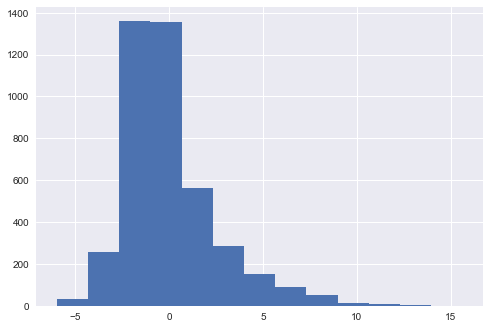

Non-normal distribution  (0.8928661346435547, 0.0)


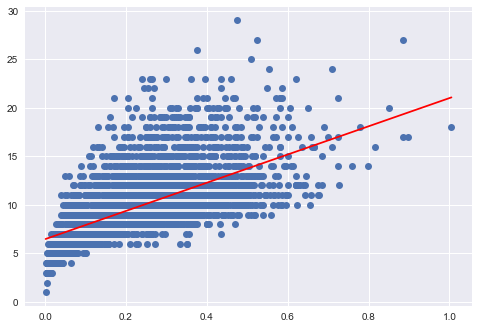

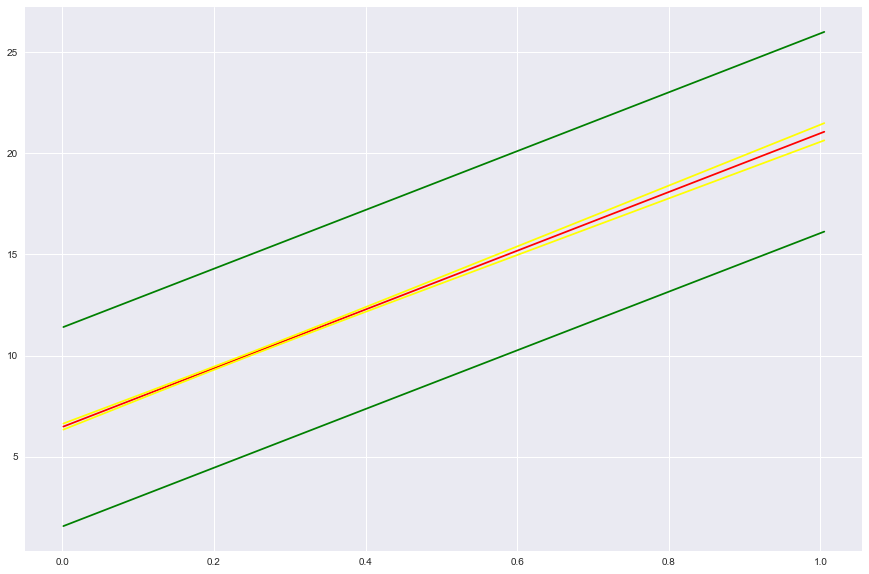

In [39]:
y = selected['Class_number_of_rings'].values
x = selected['Shell_weight'].values
linear_regression(x, y)

In [40]:
def linear_regression_2(x, y, interception = True):
    N = len(y)
    lenx = len(x.columns)
    lst = []
    if interception:
        x = np.hstack((np.full((N, 1), 1), x))
        lenx += 1
    X = np.array(x)
    Y = np.array(y)
    alpha = 0.05


    XT = X.transpose()
    XTX = np.dot(XT, X)

    A = np.dot(np.dot(np.linalg.inv(XTX), XT),Y)
    
    sse = np.dot((Y - np.dot(X, A)).T, Y - np.dot(X, A))
    s2z = sse / (N - lenx)
    DC = s2z*(np.linalg.inv(XTX))
    standdev = []
    a_min = []
    a_max = []
    t = []
    p = []

    for i in range(lenx):
        standdev.append(math.sqrt(DC[i][i]))
        acc = st.t.ppf(1 - alpha / 2, N - lenx) * math.sqrt(DC[i][i])
        a_min.append(A[i] - acc)
        a_max.append(A[i] + acc)
        t.append(round(A[i]/standdev[i],5))
        p.append(round(2 * (1 - st.t.cdf(abs(t[i]), N - lenx - 1)), 5))
    
    for i in range(lenx):
        if p[i] < 0.05:
            lst.append([A[i], standdev[i], (a_min[i], a_max[i]),t[i],p[i],  "Significant"])
        else:
            lst.append([A[i], standdev[i], (a_min[i], a_max[i]),t[i],p[i],  "Insignificant"])
    display(pd.DataFrame(lst, columns = columns)) ;
    stdy = StandardDeviation(Y, sum(Y)/len(Y))
    deter = 1 - ((N - lenx) * s2z) / ((N - 1) * stdy ** 2)
    print("Coefficient of determination: ", deter, deter * 100, " %")
    f = (deter / (1 - deter)) * ((N - lenx) / lenx)
    pv = 1 - st.f.cdf(f, lenx, N - lenx)
    print("F-test ", (f, round(pv, 3)))
    yxsi = Y - X.dot(A)
    print("Residual variance ", s2z)
    histogram(yxsi)
    shapiro_wilk_test(yxsi)
    plt.plot(Y, yxsi, 'o')

In [41]:
df = pd.read_csv(r"D:\abalone.csv")
del df['Sex']

,Value,Standard Deviation,Confidence Interval,Statistic,P-Value,Conclusion
0,2.985154,0.269126,"(2.4575232046662685, 3.512785158205649)",11.09202,0.00000,Significant
1,-1.571897,1.824760,"(-5.149399192580631, 2.0056044416662333)",-0.86143,0.38905,Insignificant
2,13.360916,2.237077,"(8.975051845604575, 17.746780495636358)",5.97249,0.00000,Significant
3,11.826072,1.548128,"(8.79091531080234, 14.861229656880898)",7.63895,0.00000,Significant
4,9.247414,0.732644,"(7.811040864349485, 10.683788025696268)",12.62197,0.00000,Significant
5,-20.213913,0.823310,"(-21.828040244507218, -18.59978612703682)",-24.55200,0.00000,Significant
6,-9.829675,1.304005,"(-12.386219866067167, -7.273131097069884)",-7.53807,0.00000,Significant
7,8.576242,1.136736,"(6.347633716711133, 10.804851113124698)",7.54462,0.00000,Significant


Coefficient of determination:  0.5275168245561539 52.75168245561539  %
F-test  (581.8243262071401, 0.0)
Residual variance  4.9186572750481625


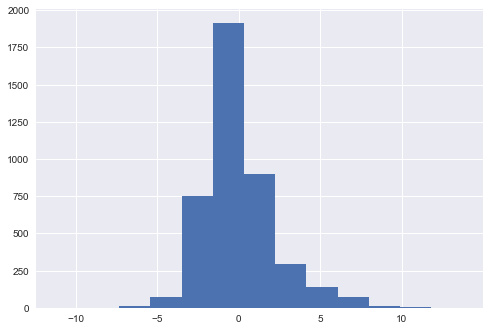

Non-normal distribution  (0.9246965646743774, 1.413770020657308e-41)


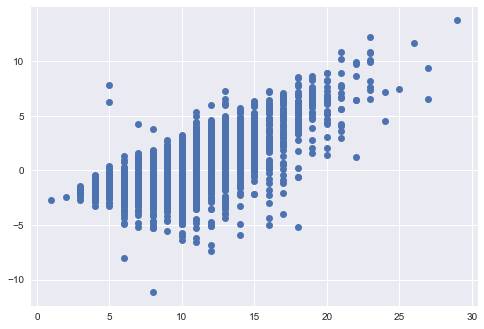

In [42]:
y = df['Class_number_of_rings'].values
x = df.loc[:,(df.columns != 'Class_number_of_rings')]

linear_regression_2(x, y)

In [43]:
y = df['Class_number_of_rings'].values
x = stap.add_constant(df.loc[:,(df.columns != 'Class_number_of_rings')].values)
model = stap.OLS(y, x)
result = model.fit()
rs = result.rsquared
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.527
Method:                 Least Squares   F-statistic:                     665.2
Date:                Tue, 08 Aug 2023   Prob (F-statistic):               0.00
Time:                        23:33:58   Log-Likelihood:                -9250.0
No. Observations:                4177   AIC:                         1.852e+04
Df Residuals:                    4169   BIC:                         1.857e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9852      0.269     11.092      0.000       2.458       3.513
x1            -1.5719      1.825     -0.861      0.389      -5.149       2.006
x2            13.3609      2.237      5.972      0.000       8.975      17.747
x3            11.8261      1.548      7.639      0.000       8.791      14.861
x4             9.2474      0.733     12.622      0.000       7.811      10.684
x5           -20.2139      0.823    -24.552      0.000     -21.828     -18.600
x6            -9.8297      1.304     -7.538      0.000     -12.386      -7.273
x7             8.5762      1.137      7.545      0.000       6.348      10.805
==============================================================================
Omnibus:                      933.799   Durbin-Watson:                   1.387
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2602.745
Skew:                           1.174   Prob(JB):                         0.00
Kurtosis:                       6.072   Cond. No.                         131.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
y = df['Class_number_of_rings'].values
x = stap.add_constant(df.loc[:,(df.columns != 'Class_number_of_rings')].values)
model = stap.OLS(y, x)
result = model.fit()
rs = result.rsquared
N = len(y)
alpha = 0.05
m = len(x[0])
print("Value of the coefficient of determination ", round(rs, 3), round(rs * 100, 3), "%")
f = (rs / (1 - rs)) * ((N - m - 1) /m)
p = 1 - st.f.cdf(f, m, N - m-1)

if p >= alpha:
    print("f = ", f, " p = ", round(p, 4), "Insignificant")
else:
    print("f = ", f, " p = ", round(p, 4), "Significant")

Value of the coefficient of determination  0.528 52.763 %
f =  581.9488193878306  p =  0.0 Significant


,Value,Standard Deviation,Confidence Interval,Statistic,P-Value,Conclusion
0,91.298447,3.895852,"(82.72373310461111, 99.87315999702142)",23.434780,4.534917e-10,Significant
1,-5.891654,0.357498,"(-6.67850023695069, -5.10480676673547)",-16.480264,1.410820e-08,Significant


Coefficient of determination:  96.10756016737265  %
F-test  (135.79955083435598, 1.7628708492978262e-08)
Residual variance  0.7467713868543242


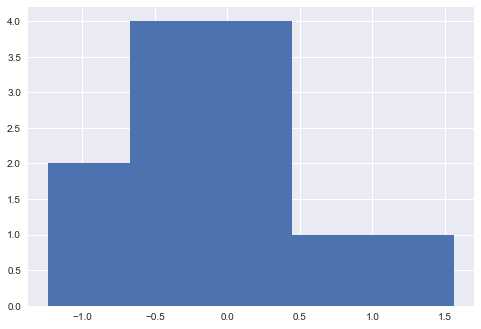

Normal distribution  (0.9536806344985962, 0.6549474000930786)


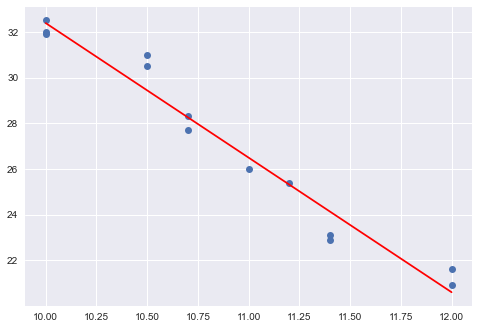

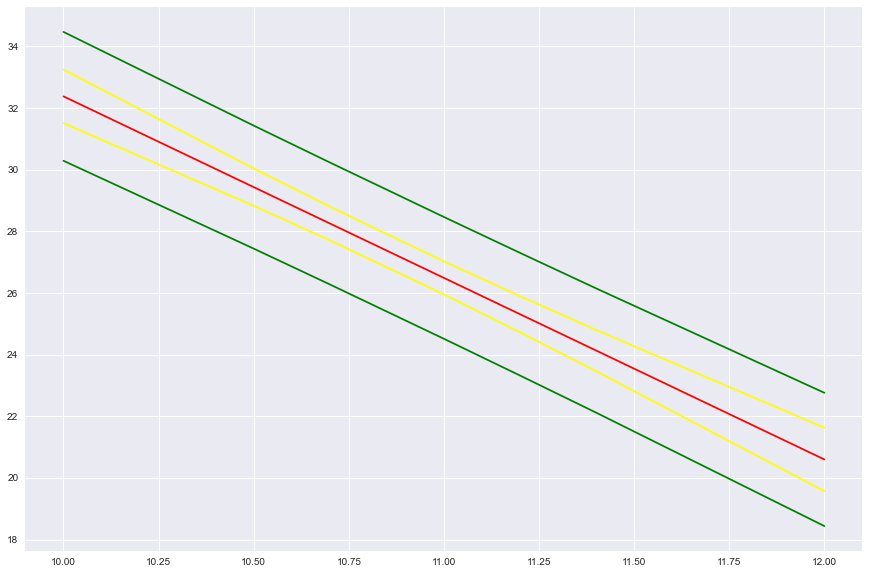

In [45]:
x = [10, 10.5, 10.7, 11, 11.2, 10, 10.5, 11.4, 10.7, 12, 10, 11.4, 12]
y = [31.9, 31, 27.7, 26, 25.4, 32.5, 30.5, 23.1, 28.3, 20.9, 32, 22.9, 21.6]
linear_regression(x, y)